# Homework 1

## Read & process image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('bag.png')

In [3]:
type(image)

numpy.ndarray

In [4]:
image.shape

(250, 189, 3)

In [5]:
image.max()

255

In [6]:
image.min()

0

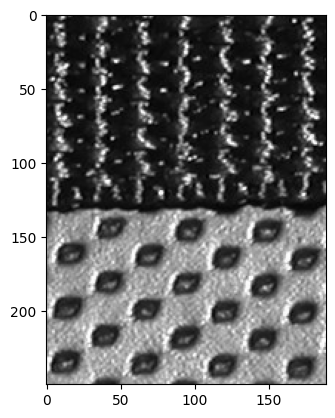

In [7]:
plt.imshow(image)
plt.show()

### crop image

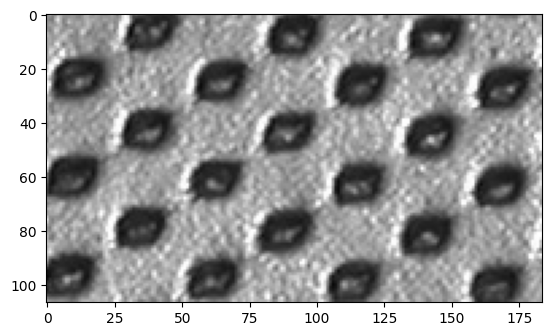

In [8]:
plt.imshow(image[138:245, 5:])
plt.show()

In [9]:
image = image[138:245, 5:]

### convert BGR to RGB

In [10]:
rgb_image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

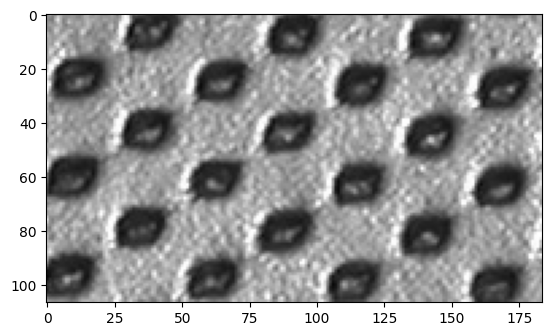

In [11]:
plt.imshow(rgb_image)
plt.show()

### convert BGR to gray scale

In [12]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

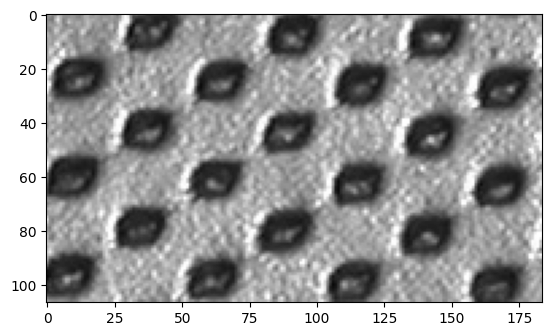

In [13]:
plt.imshow(gray_image, cmap='gray', vmin=0, vmax=255)
plt.show()

### convert gray scale to binary image

In [14]:
ret, binary_image = cv2.threshold(gray_image, 70, 255, 0)

In [15]:
binary_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255,   0, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

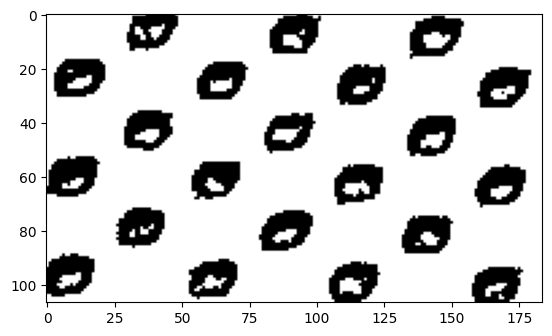

In [16]:
plt.imshow(binary_image, cmap='gray', vmin=0, vmax=255)
plt.show()

### invert black and white pixel

In [17]:
inverted_image = cv2.bitwise_not(binary_image)

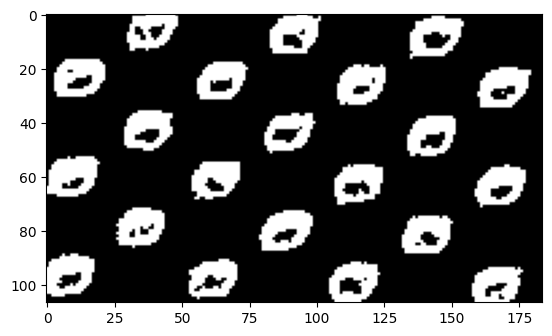

In [18]:
plt.imshow(inverted_image, cmap='gray', vmin=0, vmax=255)
plt.show()

## 4-adjacency

In [19]:
num_labels_4adjacency, labels_4adjacency = cv2.connectedComponents(inverted_image, connectivity=4)
color_image_4adjacency = np.zeros((binary_image.shape[0], binary_image.shape[1], 3), dtype=np.uint8)
for label in range(1, num_labels_4adjacency):
    mask = (labels_4adjacency == label)
    color = np.random.randint(0, 256, size=(1, 3), dtype=np.uint8)
    color_image_4adjacency[mask] = color

In [29]:
num_labels_4adjacency

23

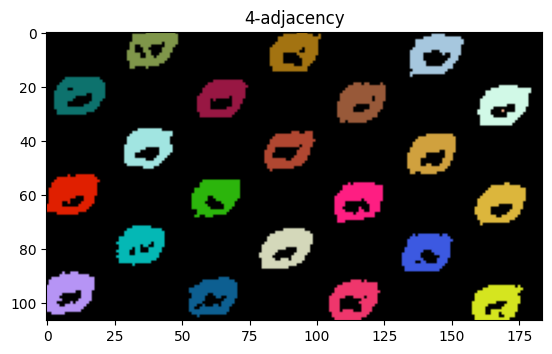

In [20]:
plt.imshow(color_image_4adjacency)
plt.title('4-adjacency')
plt.show()

## 8-adjacency & m-adjacency

### 8-adjacency and m-adjacency are the same result because they will merge subset of pixel in the same way.

In [21]:
num_labels_8adjacency, labels_8adjacency = cv2.connectedComponents(inverted_image, connectivity=8)
color_image_8adjacency = np.zeros((binary_image.shape[0], binary_image.shape[1], 3), dtype=np.uint8)
for label in range(1, num_labels_8adjacency):
    mask = (labels_8adjacency == label)
    color = np.random.randint(0, 256, size=(1, 3), dtype=np.uint8)
    color_image_8adjacency[mask] = color

In [28]:
num_labels_8adjacency

23

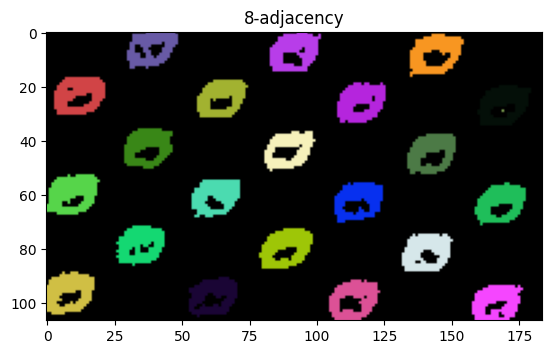

In [22]:
plt.imshow(color_image_8adjacency)
plt.title('8-adjacency')
plt.show()

## Summary
- In this picture 4-adjacency, 8-adjacency and m-adjacency will get the same result of labeling.